In [823]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [824]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app_df = application_df.drop(columns=["EIN"], axis=1)
app_df

NAME APPLICATION_TYPE  \
0                           BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1                 AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2                     ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3                         SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4               GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   
...                                                  ...              ...   
34294              THE LIONS CLUB OF HONOLULU KAMEHAMEHA               T4   
34295           INTERNATIONAL ASSOCIATION OF LIONS CLUBS               T4   
34296                                PTA HAWAII CONGRESS               T3   
34297  AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...               T5   
34298                           WATERHOUSE CHARITABLE TR               T3   

            AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0           Independent          C1000    ProductDev   Association       1   
1           Independent          C2000  Preservation  Co-operative       1   
2      CompanySponsored          C3000    ProductDev   Association       1   
3      CompanySponsored          C2000  Preservation         Trust       1   
4           Independent          C1000     Heathcare         Trust       1   
...                 ...            ...           ...           ...     ...   
34294       Independent          C1000    ProductDev   Association       1   
34295  CompanySponsored          C3000    ProductDev   Association       1   
34296  CompanySponsored          C2000  Preservation   Association       1   
34297       Independent          C3000    ProductDev   Association       1   
34298       Independent          C1000  Preservation  Co-operative       1   

          INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  IS_SUCCESSFUL  
0                  0                      N      5000              1  
1             1-9999                      N    108590              1  
2                  0                      N      5000              0  
3        10000-24999                      N      6692              1  
4      100000-499999                      N    142590              1  
...              ...                    ...       ...            ...  
34294              0                      N      5000              0  
34295              0                      N      5000              0  
34296              0                      N      5000              0  
34297              0                      N      5000              1  
34298          1M-5M                      N  36500179              0  

[34299 rows x 11 columns]

In [825]:
# Look at EIN value counts for binning
NAME_counts = app_df.NAME.value_counts()
NAME_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

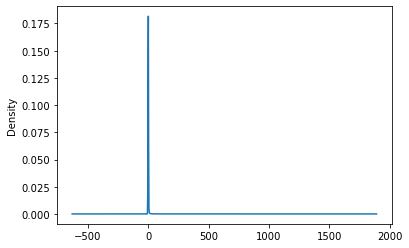

In [826]:
# Visualize the value counts of NAME
NAME_counts.plot.density()

In [827]:
# Look at CLASSIFICATION value counts for binning
class_counts = app_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [828]:
# Determine which values to replace if counts are less than ..?
replace_CLASSIFICATION = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for CLASSIFICATION in replace_CLASSIFICATION:
    app_df.CLASSIFICATION = app_df.CLASSIFICATION.replace(CLASSIFICATION,"Other")
    
# Check to make sure binning was successful
app_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [829]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = app_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [830]:
# Determine which values to replace
replace_APPLICATION_TYPE = list(app_counts[app_counts < 500].index)

# Replace in DataFrame
for APPLICATION_TYPE in replace_APPLICATION_TYPE:
    app_df.APPLICATION_TYPE = app_df.APPLICATION_TYPE.replace(APPLICATION_TYPE,"Other")


# Check to make sure binning was successful
app_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [831]:
# Generate our categorical variable lists

app_cat = app_df.dtypes[app_df.dtypes == "object"].index.tolist()
app_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [832]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(app_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   NAME_100 BLACK MEN OF AMERICA  NAME_100 BLACK MEN OF MEMPHIS INC  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   NAME_100 BLACK MEN OF WEST GEORGIA INC  NAME_1150 WEBSTER STREET INC  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   

   NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION  \
0                                                0.0                           
1                                                0.0                           
2                                                0.0                           
3                                                0.0                           
4                                                0.0                           

   NAME_13TH BOMB SQUADRON ASSOCIATION  NAME_146TH ALUMNI ASSOCIATION  \
0                                  0.0                            0.0   
1                                  0.0                            0.0   
2                                  0.0                            0.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   

   NAME_14TH ARMORED DIVISION  \
0                         0.0   
1                         0.0   
2                         0.0   
3                         0.0   
4                         0.0   

   NAME_150TH INTELLIGENCE SQUADRON ENLISTED ADVISORY COUNCIL  ...  \
0                                                0.0           ...   
1                                                0.0           ...   
2                                                0.0           ...   
3                                                0.0           ...   
4                                                0.0           ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                 

In [833]:
# Merge one-hot encoded features and drop the originals
app_df = app_df.merge(encode_df,left_index=True, right_index=True)
app_df = app_df.drop(app_cat,1)
app_df.head()

C:\Users\c_tal\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  ASK_AMT  IS_SUCCESSFUL  \
0       1     5000              1   
1       1   108590              1   
2       1     5000              0   
3       1     6692              1   
4       1   142590              1   

   NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   NAME_100 BLACK MEN OF AMERICA  NAME_100 BLACK MEN OF MEMPHIS INC  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   NAME_100 BLACK MEN OF WEST GEORGIA INC  NAME_1150 WEBSTER STREET INC  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   

   NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION  \
0                                                0.0                           
1                                                0.0                           
2                                                0.0                           
3                                                0.0                           
4                                                0.0                           

   NAME_13TH BOMB SQUADRON ASSOCIATION  ...  INCOME_AMT_1-9999  \
0                                  0.0  ...                0.0   
1                                  0.0  ...                1.0   
2                                  0.0  ...                0.0   
3                                  0.0  ...                0.0   
4                                  0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 19612 columns]

In [834]:
# Split our preprocessed data into our features and target arrays
y = app_df.IS_SUCCESSFUL.values
X = app_df.drop(["IS_SUCCESSFUL"], axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [835]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [836]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 9
#hidden_nodes_layer4 = 5
#hidden_nodes_layer5 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Sixth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_231 (Dense)           (None, 30)                588360    
                                                                 
 dense_232 (Dense)           (None, 10)                310       
                                                                 
 dense_233 (Dense)           (None, 9)                 99        
                                                                 
 dense_234 (Dense)           (None, 1)                 10        
                                                                 
Total params: 588,779
Trainable params: 588,779
Non-trainable params: 0
_________________________________________________________________


In [837]:
# Import Checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [838]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs https://itecnote.com/tecnote/python-save-model-weights-at-the-end-of-every-n-epochs/
cp_callback = ModelCheckpoint("weights{epoch:08d}.h5",
                                      save_weights_only=True, save_freq=5)

In [839]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 

Epoch 1/50
804/804 [==============================] - 4s 4ms/step - loss: 0.5523 - accuracy: 0.7677
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.3578 - accuracy: 0.8646
Epoch 3/50
804/804 [==============================] - 3s 4ms/step - loss: 0.1702 - accuracy: 0.9438
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.1158 - accuracy: 0.9607
Epoch 5/50
804/804 [==============================] - 3s 4ms/step - loss: 0.1045 - accuracy: 0.9625
Epoch 6/50
804/804 [==============================] - 3s 4ms/step - loss: 0.1000 - accuracy: 0.9629
Epoch 7/50
804/804 [==============================] - 3s 4ms/step - loss: 0.0962 - accuracy: 0.9640
Epoch 8/50
804/804 [==============================] - 3s 4ms/step - loss: 0.0949 - accuracy: 0.9638
Epoch 9/50
804/804 [==============================] - 3s 4ms/step - loss: 0.0929 - accuracy: 0.9643
Epoch 10/50
804/804 [==============================] - 3s 4ms/step - loss: 0.0922 - accuracy: 0.9636

In [840]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4779 - accuracy: 0.7830 - 763ms/epoch - 3ms/step
Loss: 0.47793424129486084, Accuracy: 0.7829737663269043


In [841]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optamization.h5")